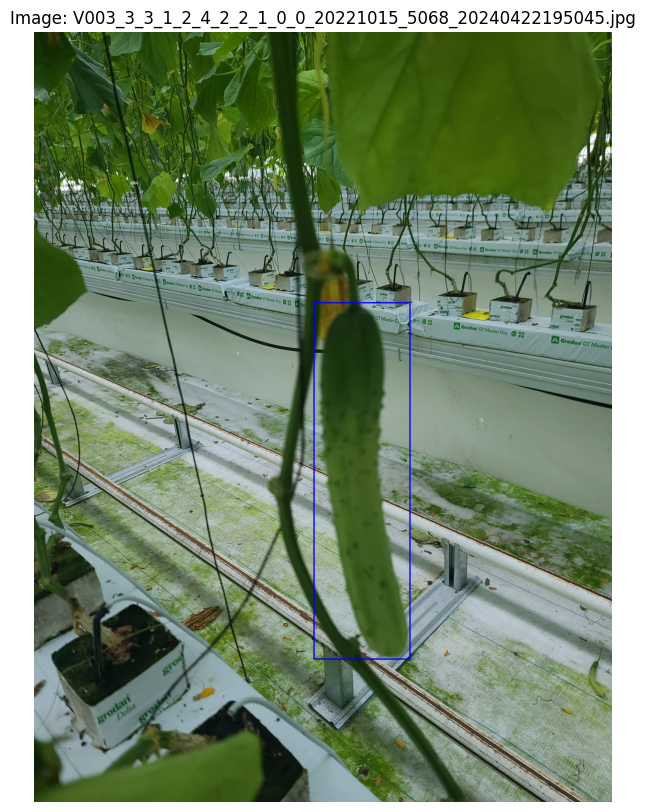

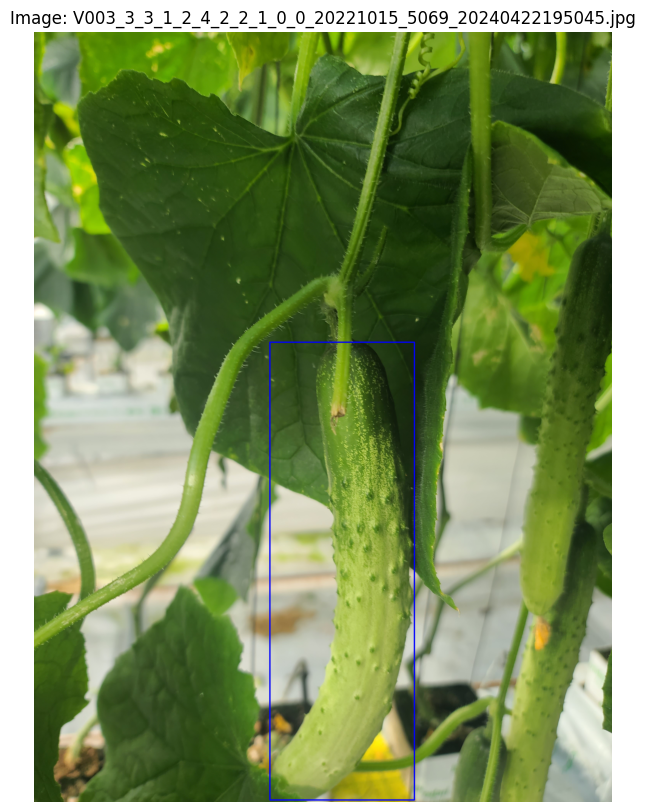

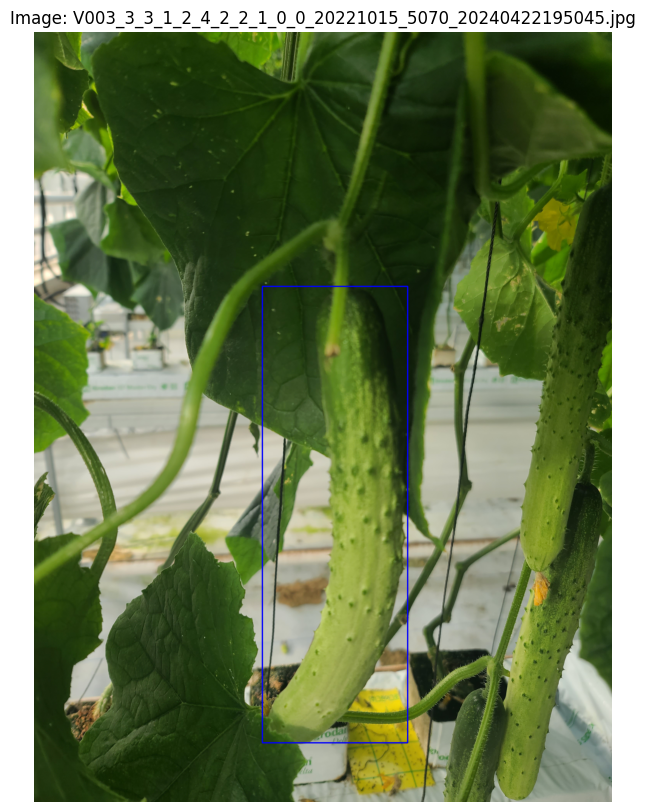

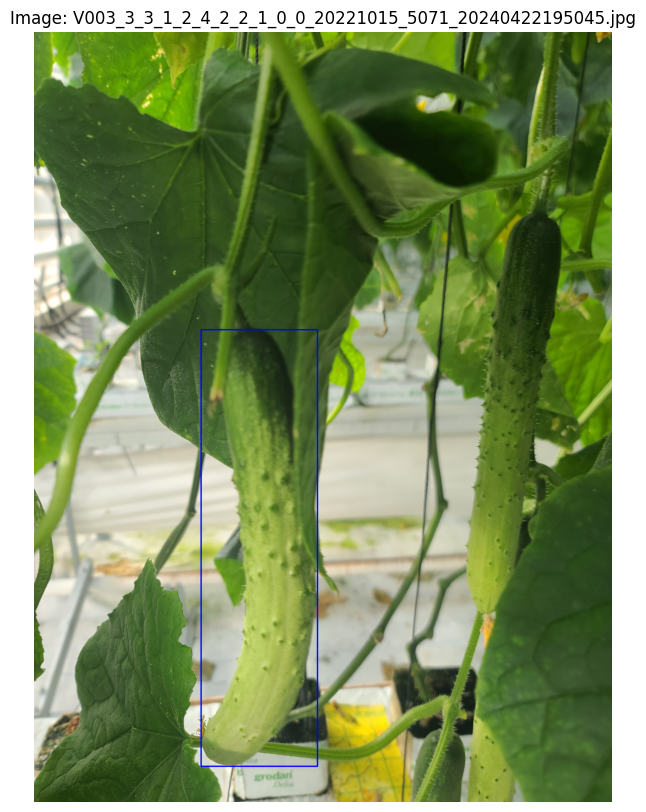

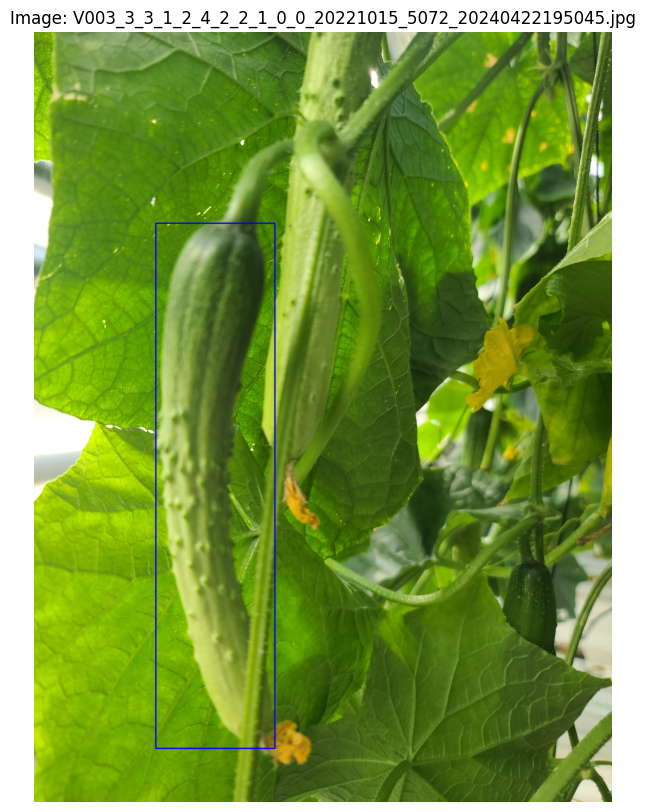

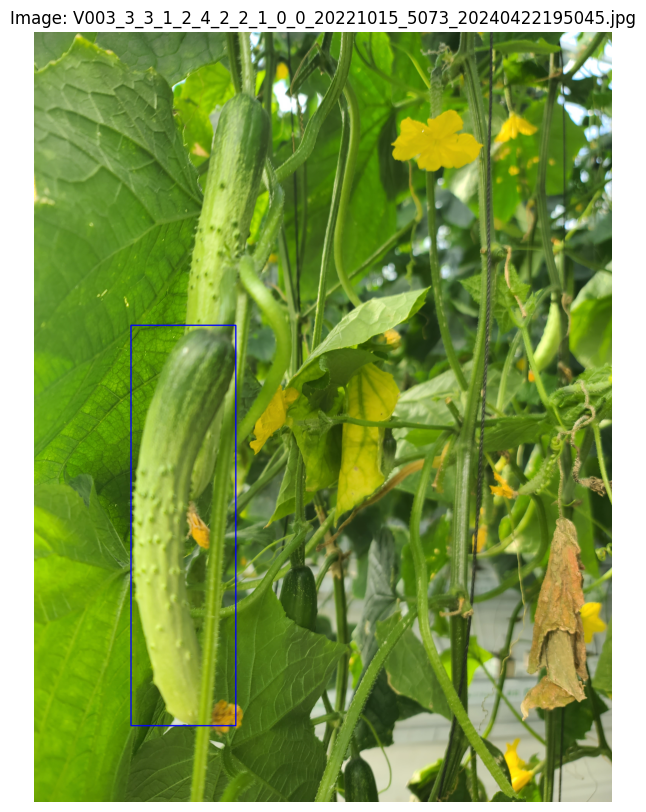

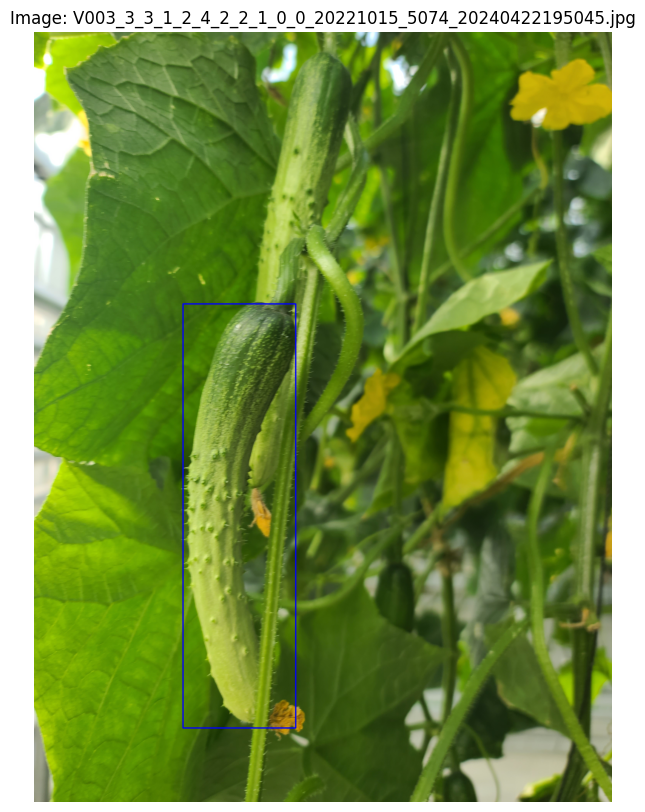

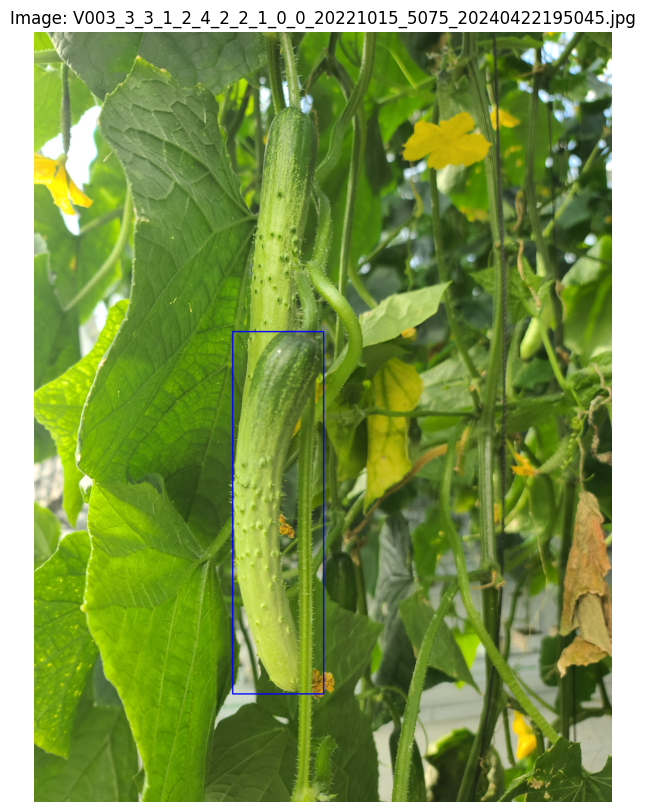

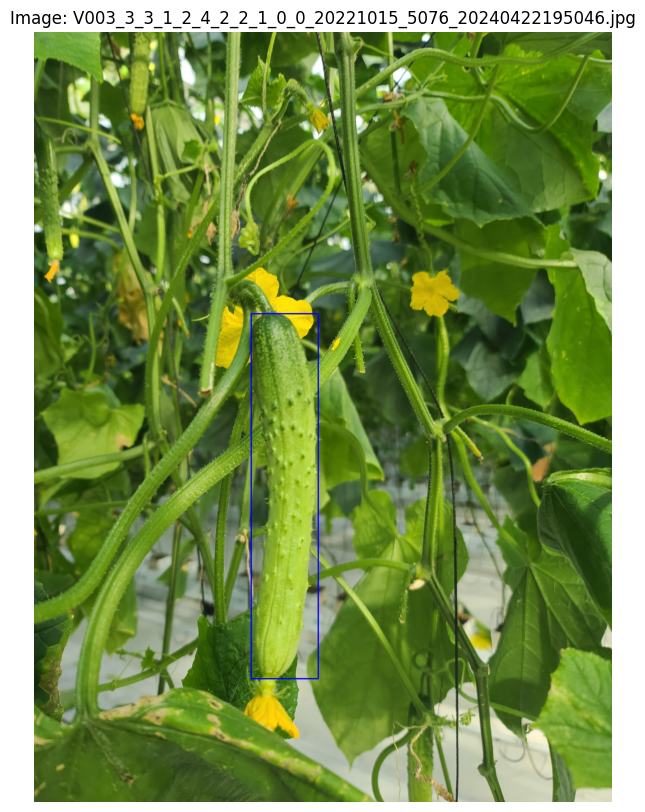

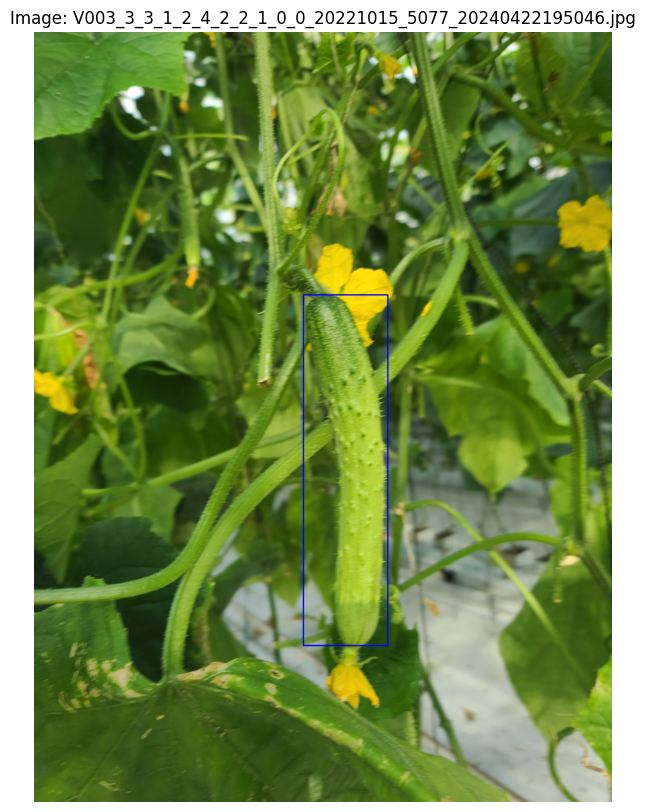

In [5]:
import json
import os
import cv2
import matplotlib.pyplot as plt
from collections import defaultdict

# 이미지와 레이블 경로
image_folder = 'data/images/'
label_folder = 'data/labels/'

def visualize_multiple_bboxes(image_folder, label_folder, max_images=10):
    # 이미지를 시각화한 개수 카운터
    visualized_count = 0
    
    # 이미지에 대한 여러 JSON 파일을 관리하기 위해 딕셔너리 사용
    image_annotations = defaultdict(list)

    # 레이블 파일 목록을 정렬된 상태로 가져옴
    label_files = sorted(os.listdir(label_folder))
    
    # 각 JSON 파일에서 이미지와 바운딩 박스 정보를 가져오기
    for label_file in label_files:
        with open(os.path.join(label_folder, label_file), 'r', encoding='utf-8') as f:
            annotation = json.load(f)
        
        # 이미지 파일명 가져오기
        image_name = annotation['description']['image']

        # 생육단계코드 확인
        growth_stage_code = next((item['value'] for item in annotation['metadata'] if item['name'] == '생육단계코드'), None)
        
        # 생육단계코드가 '착화/과실기'인 경우만 고려
        if growth_stage_code == '착화/과실기':
            image_annotations[image_name].append(annotation)
    
    # 필터링된 이미지에 대해 시각화
    for image_name, annotations in image_annotations.items():
        if visualized_count >= max_images:
            break

        # 이미지 읽기
        image_path = os.path.join(image_folder, image_name)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # 각 annotation 파일에 대해 바운딩 박스를 그리기
        for annotation in annotations:
            for result in annotation['result']:
                if result['type'] == 'bbox':
                    x, y, w, h = result['x'], result['y'], result['w'], result['h']
                    # 바운딩 박스 그리기 (색상을 진하게, 두께를 6으로 설정)
                    cv2.rectangle(image, (int(x), int(y)), (int(x + w), int(y + h)), (0, 0, 255), 6)  # 진한 빨간색 바운딩 박스 두께 6
        
        # 이미지 시각화
        plt.figure(figsize=(10, 10))
        plt.imshow(image)
        plt.title(f"Image: {image_name}")
        plt.axis('off')
        plt.show()

        visualized_count += 1

# 코드 실행
visualize_multiple_bboxes(image_folder, label_folder)
